In [46]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt

In [47]:
#Функция для аппроксимации
def ApproxFunc(x):
    return x**2
    #return np.sin(x)*10 + x**2

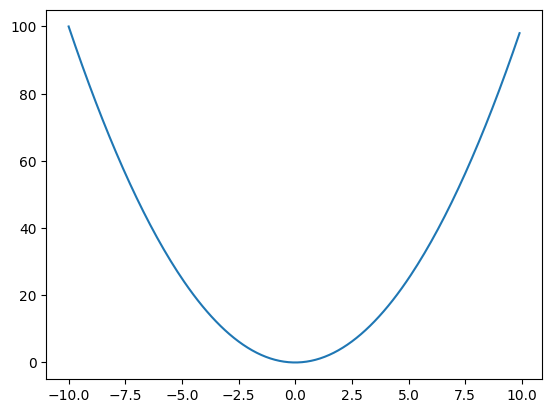

In [48]:
#интервал, на котором будем аппроксимировать функцию
pcenter = 0
prange = 10
step = 0.1
period = np.arange(pcenter-prange , pcenter+prange,step)
plt.plot(period,ApproxFunc(period))

In [ ]:
class ApproximationNN(object):
    def __init__(self,learning_rate=0.1,input_nodes=1,hidden_nodes=5,output_nodes=1):
        input_nodes += 1
        self.weigths_0_1 = np.random.normal(0.0,2** -0.5, (hidden_nodes,input_nodes))
        self.weigths_1_2 = np.random.normal(0.0,1, (output_nodes,hidden_nodes))
        self.sigmoid_mapper = np.vectorize(self.sigmoid)
        self.learning_rate = np.array([learning_rate])
        
        def sigmoid(self,x):
            return 1/ (1 + np.exp(-x))
        def predict(self,inputs):
            pass